# Text Classification - Vanilla Mixture of Experts (End 2 End, Soft Forest) Analysis

----

## $\color{blue}{Sections:}$
* Preamble
* Load Results
* Scores
* Examination
* Save

## $\color{blue}{Preamble:}$

This notebook will analyse the results of the end to end, soft, MOE model.

## $\color{blue}{Load-Results:}$


In [1]:
from google.colab import drive
drive.mount("/content/drive")
%cd '/content/drive/MyDrive/'

Mounted at /content/drive
/content/drive/MyDrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = 'class/datasets/df_dev'
df = pd.read_pickle(path)

In [4]:
df.columns

Index(['index', 'master', 'book_idx', 'book', 'chapter_idx', 'chapter',
       'author', 'content', 'vanilla_embedding', 'vanilla_preds',
       'vanilla_pseudo_book', 'vanilla_moe_e2e_soft_preds',
       'vanilla_moe_e2e_soft_pseudo_book', 'vanilla_moe_e2e_hard_preds',
       'vanilla_moe_e2e_hard_pseudo_book',
       'vanilla_moe_e2e_soft_forest_preds'],
      dtype='object')

In [5]:
grouped = dict(df.groupby("book_idx")['chapter_idx'].unique())

In [6]:
pred2book = {}
for key in grouped.keys():
  chapters = grouped[key]
  for chapter in chapters:
    pred2book[chapter] = key

modify below

In [7]:
df['vanilla_moe_e2e_soft_forest_pseudo_book'] = df['vanilla_moe_e2e_soft_forest_preds'].map(pred2book)

...saving

In [8]:
path = 'class/datasets/'
df.to_pickle(path + 'df_dev')

In [9]:
df.columns

Index(['index', 'master', 'book_idx', 'book', 'chapter_idx', 'chapter',
       'author', 'content', 'vanilla_embedding', 'vanilla_preds',
       'vanilla_pseudo_book', 'vanilla_moe_e2e_soft_preds',
       'vanilla_moe_e2e_soft_pseudo_book', 'vanilla_moe_e2e_hard_preds',
       'vanilla_moe_e2e_hard_pseudo_book', 'vanilla_moe_e2e_soft_forest_preds',
       'vanilla_moe_e2e_soft_forest_pseudo_book'],
      dtype='object')

## $\color{blue}{Scores:}$


In [10]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [11]:
def bar_chart(values, cats, title):

    fig, ax = plt.subplots(1,1, figsize = (12,5))

    D_color = {
        0: '0',
        1: '0.5',
        2: '0.8',
        3: 'blue',
        4: 'red',
        5: 'green'

    }

    D_label = {
        0: "Uly1",
        1: "Uly2",
        2: "Uly3",
        3: "Dub",
        4: "Drac",
        5: "Rep"
    }

    ax.bar(
        x = list(range(len(values))),
        height = values,
        color = [D_color[el] for el in cats],
        edgecolor = 'black',
        zorder= 3,
        label= [D_label[el] for el in cats]  # Create a label for the legend

    )

    ax.grid(zorder=0,
            which='both',
            axis='y',
            linewidth=0.5,
            linestyle='--'
    )

    ax.yaxis.set_major_locator(plt.MaxNLocator())  # Show integer ticks


    # Create custom legend
    handles = [plt.Rectangle((0,0),1,1, color=D_color[i]) for i in D_color]
    labels = [D_label[i] for i in range(len(D_label))]
    ax.legend(handles, labels, title="Books", loc='upper right')


    # Add title
    plt.title(title)



    # Show the plot
    plt.show()


### $\color{red}{Chapter:}$

70 class problem


modify below

In [12]:
chapter_reals = df['chapter_idx'].to_numpy()
chapter_preds = df['vanilla_moe_e2e_soft_forest_preds'].to_numpy()

#### $\color{green}{Accuracy:}$

$\frac{1}{N}\sum_{i=1}^N (y_{true} = y_{pred})$


In [13]:
chapter_accuracy = accuracy_score(chapter_reals, chapter_preds)
chapter_accuracy

0.553941908713693

#### $\color{green}{Precision:}$

Proportion of predictions that are correct

$\frac{TP}{TP + FP}$

* class_precision - stat per class
* macro - average over classes
* weighted - macro weighted by class sizes
* micro - global average (count every true positive and false positive)

In [14]:
chapter_precision = precision_score(chapter_reals, chapter_preds, average= None, zero_division=np.nan)
chapter_macro_precision = precision_score(chapter_reals, chapter_preds, average="macro", zero_division=np.nan)
chapter_weighted_precision = precision_score(chapter_reals, chapter_preds, average="weighted",zero_division=np.nan)
chapter_micro_precision = precision_score(chapter_reals, chapter_preds, average="micro",zero_division=np.nan)
print('macro precision:', chapter_macro_precision)
print('weighted precision:', chapter_weighted_precision)
print('micro precision:', chapter_micro_precision)

macro precision: 0.4687436216610759
weighted precision: 0.5658783519109607
micro precision: 0.553941908713693


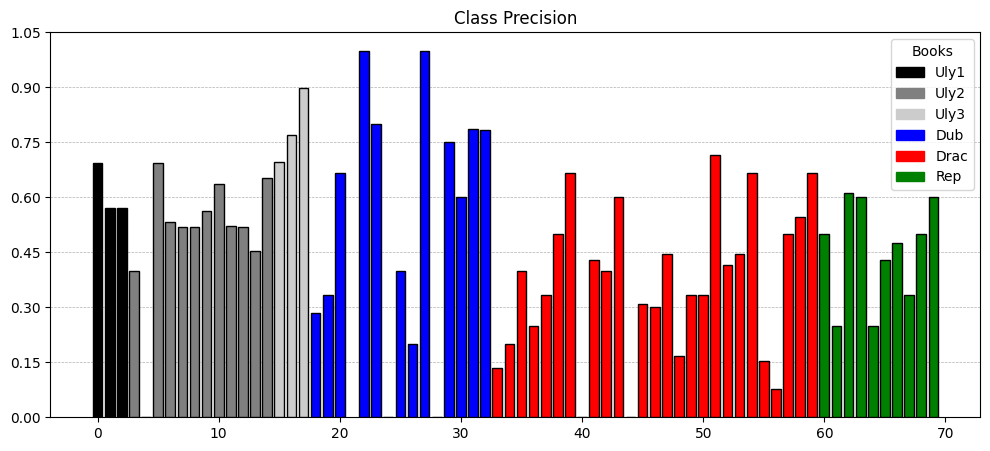

In [15]:
vals = chapter_precision
cats = [pred2book[i] for i in range(70)]
title = "Class Precision"
bar_chart(vals, cats, title)

#### $\color{green}{Recall:}$

Proportion of reals that are true.

$\frac{TP}{TP + FN}$


In [16]:
chapter_recall = recall_score(chapter_reals, chapter_preds, average= None, zero_division=np.nan)
chapter_macro_recall = recall_score(chapter_reals, chapter_preds, average="macro", zero_division=np.nan)
chapter_weighted_recall = recall_score(chapter_reals, chapter_preds, average="weighted",zero_division=np.nan)
chapter_micro_recall = recall_score(chapter_reals, chapter_preds, average="micro",zero_division=np.nan)
print('macro recall:', chapter_macro_recall)
print('weighted recall:', chapter_weighted_recall)
print('micro recall:', chapter_micro_recall)

macro recall: 0.4557237323804434
weighted recall: 0.553941908713693
micro recall: 0.553941908713693


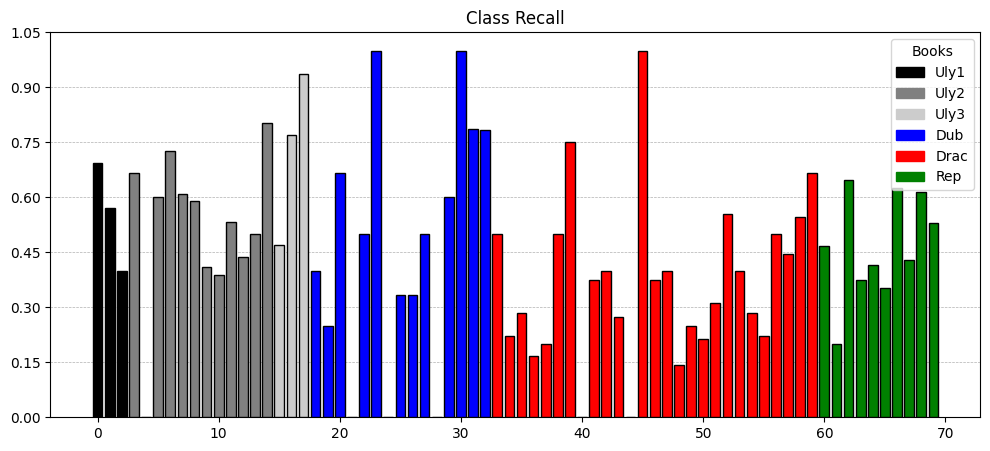

In [17]:
vals = chapter_recall
cats = [pred2book[i] for i in range(70)]
title = "Class Recall"
bar_chart(vals, cats, title)

#### $\color{green}{F1:}$

Harmonic mean precision and recall

In [18]:
chapter_f1 = f1_score(chapter_reals, chapter_preds, average= None, zero_division=np.nan)
chapter_macro_f1 = f1_score(chapter_reals, chapter_preds, average="macro", zero_division=np.nan)
chapter_weighted_f1 = f1_score(chapter_reals, chapter_preds, average="weighted",zero_division=np.nan)
chapter_micro_f1 = f1_score(chapter_reals, chapter_preds, average="micro",zero_division=np.nan)
print('macro f1:', chapter_macro_f1)
print('weighted f1:', chapter_weighted_f1)
print('micro f1:', chapter_micro_f1)


macro f1: 0.44113014432636166
weighted f1: 0.5495776122278773
micro f1: 0.553941908713693


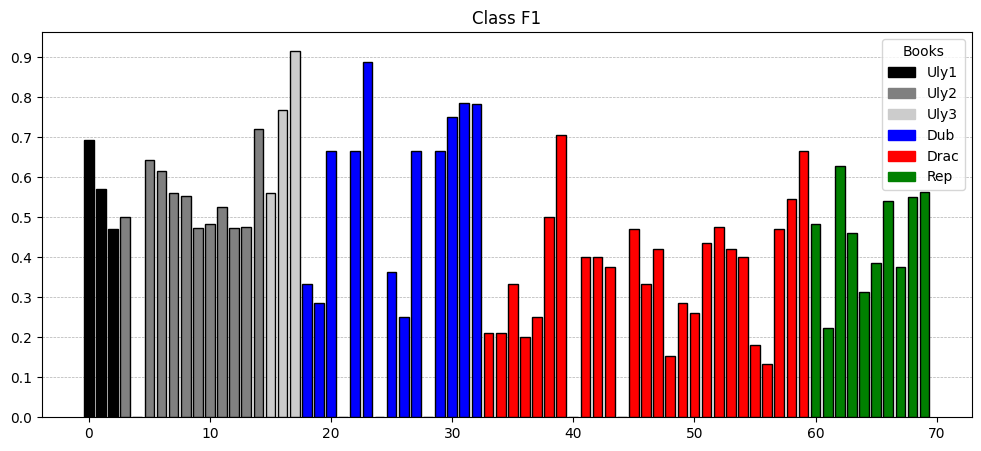

In [19]:
vals = chapter_f1
cats = [pred2book[i] for i in range(70)]
title = "Class F1"
bar_chart(vals, cats, title)

#### $\color{green}{Confusion:}$

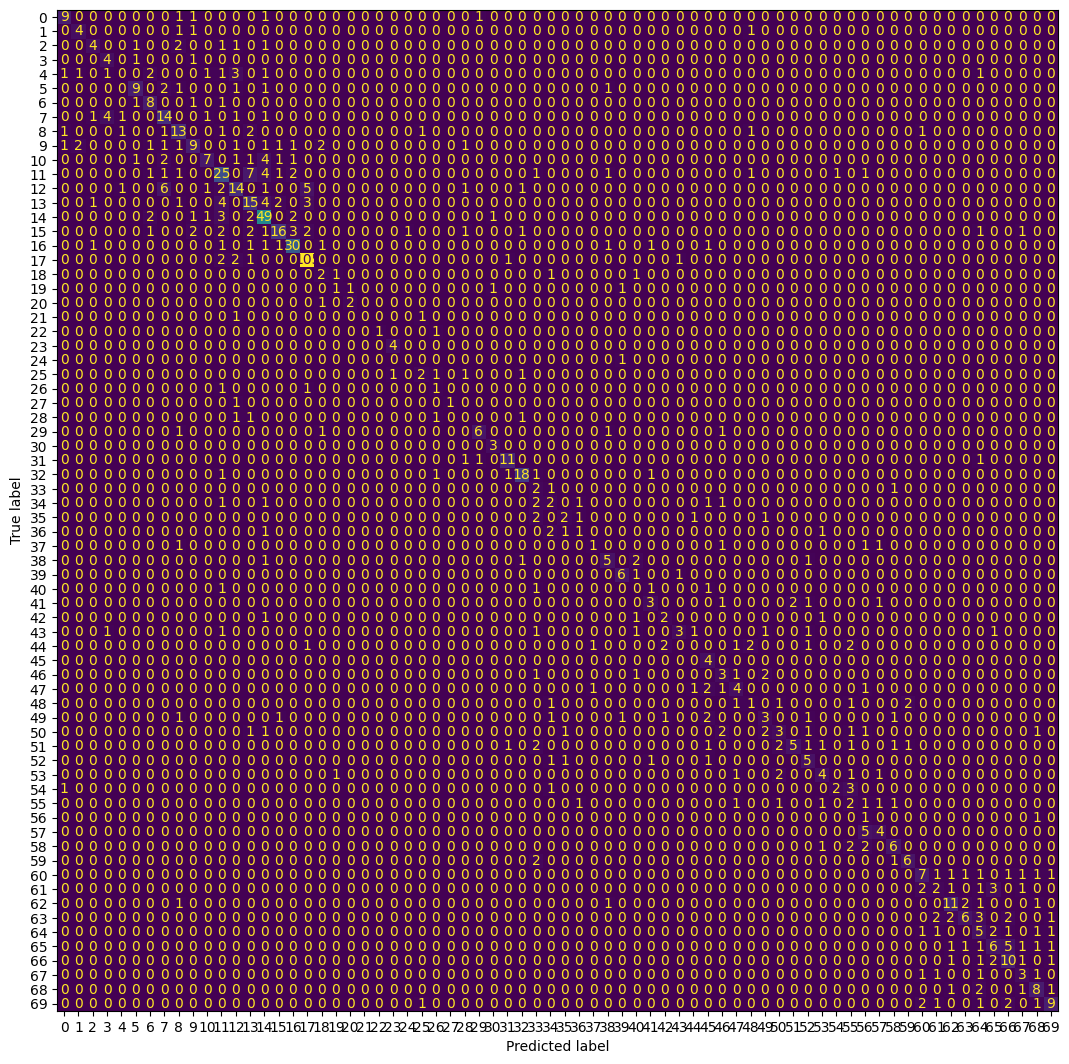

In [20]:
cm = confusion_matrix(chapter_reals, chapter_preds)
fig, ax = plt.subplots(figsize=(13,13))
cmp = ConfusionMatrixDisplay.from_predictions(chapter_reals, chapter_preds, colorbar=False, ax=ax)


### $\color{red}{Book:}$

6 class problem

In [21]:
df.columns

Index(['index', 'master', 'book_idx', 'book', 'chapter_idx', 'chapter',
       'author', 'content', 'vanilla_embedding', 'vanilla_preds',
       'vanilla_pseudo_book', 'vanilla_moe_e2e_soft_preds',
       'vanilla_moe_e2e_soft_pseudo_book', 'vanilla_moe_e2e_hard_preds',
       'vanilla_moe_e2e_hard_pseudo_book', 'vanilla_moe_e2e_soft_forest_preds',
       'vanilla_moe_e2e_soft_forest_pseudo_book'],
      dtype='object')

In [30]:
book_reals = df['book_idx'].to_numpy()
book_preds = df['vanilla_moe_e2e_soft_forest_pseudo_book'].to_numpy()

#### $\color{green}{Accuracy:}$

$\frac{1}{N}\sum_{i=1}^N (y_{true} = y_{pred})$


In [31]:
book_accuracy = accuracy_score(book_reals, book_preds)
book_accuracy

0.8703319502074689

#### $\color{green}{Precision:}$

Proportion of predictions that are correct

$\frac{TP}{TP + FP}$

* class_precision - stat per class
* macro - average over classes
* weighted - macro weighted by class sizes
* micro - global average (count every true positive and false positive)

In [32]:
book_precision = precision_score(book_reals, book_preds, average= None, zero_division=np.nan)
book_macro_precision = precision_score(book_reals, book_preds, average="macro", zero_division=np.nan)
book_weighted_precision = precision_score(book_reals, book_preds, average="weighted",zero_division=np.nan)
book_micro_precision = precision_score(book_reals, book_preds, average="micro",zero_division=np.nan)
print('macro precision:', book_macro_precision)
print('weighted precision:', book_weighted_precision)
print('micro precision:', book_micro_precision)

macro precision: 0.8341687096246266
weighted precision: 0.8693441730668685
micro precision: 0.8703319502074689


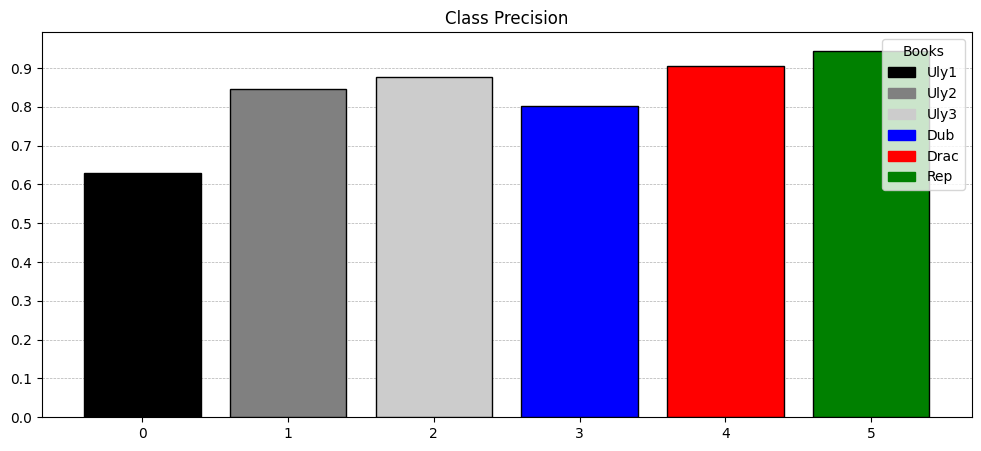

In [33]:
vals = book_precision
cats = [i for i in range(6)]
title = "Class Precision"
bar_chart(vals, cats, title)

#### $\color{green}{Recall:}$

Proportion of reals that are true.

$\frac{TP}{TP + FN}$


In [34]:
book_recall = recall_score(book_reals, book_preds, average= None, zero_division=np.nan)
book_macro_recall = recall_score(book_reals, book_preds, average="macro", zero_division=np.nan)
book_weighted_recall = recall_score(book_reals, book_preds, average="weighted",zero_division=np.nan)
book_micro_recall = recall_score(book_reals, book_preds, average="micro",zero_division=np.nan)
print('macro recall:', book_macro_recall)
print('weighted recall:', book_weighted_recall)
print('micro recall:', book_micro_recall)

macro recall: 0.8264416027086653
weighted recall: 0.8703319502074689
micro recall: 0.8703319502074689


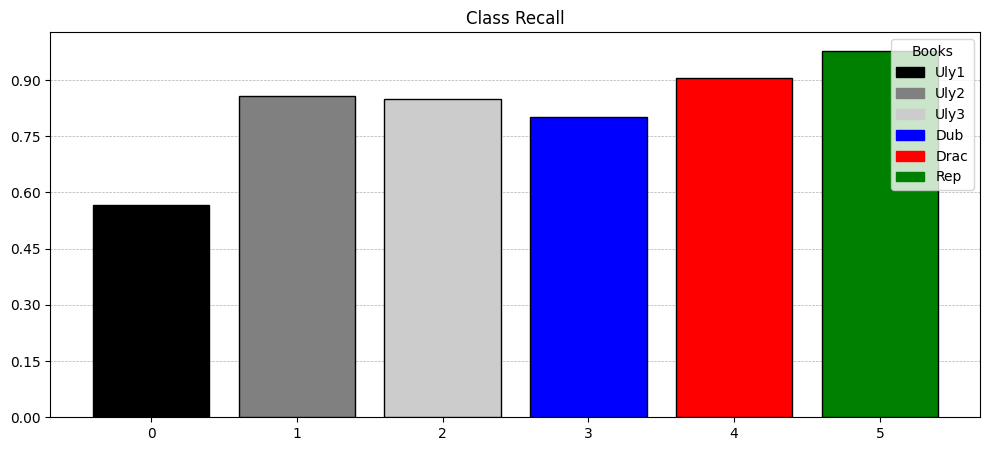

In [35]:
vals = book_recall
cats = [i for i in range(6)]
title = "Class Recall"
bar_chart(vals, cats, title)

#### $\color{green}{F1:}$

Harmonic mean precision and recall

In [36]:
book_f1 = f1_score(book_reals, book_preds, average= None, zero_division=np.nan)
book_macro_f1 = f1_score(book_reals, book_preds, average="macro", zero_division=np.nan)
book_weighted_f1 = f1_score(book_reals, book_preds, average="weighted",zero_division=np.nan)
book_micro_f1 = f1_score(book_reals, book_preds, average="micro",zero_division=np.nan)
print('macro f1:', book_macro_f1)
print('weighted f1:', book_weighted_f1)
print('micro f1:', book_micro_f1)

macro f1: 0.8299343366242082
weighted f1: 0.8696868708302352
micro f1: 0.8703319502074689


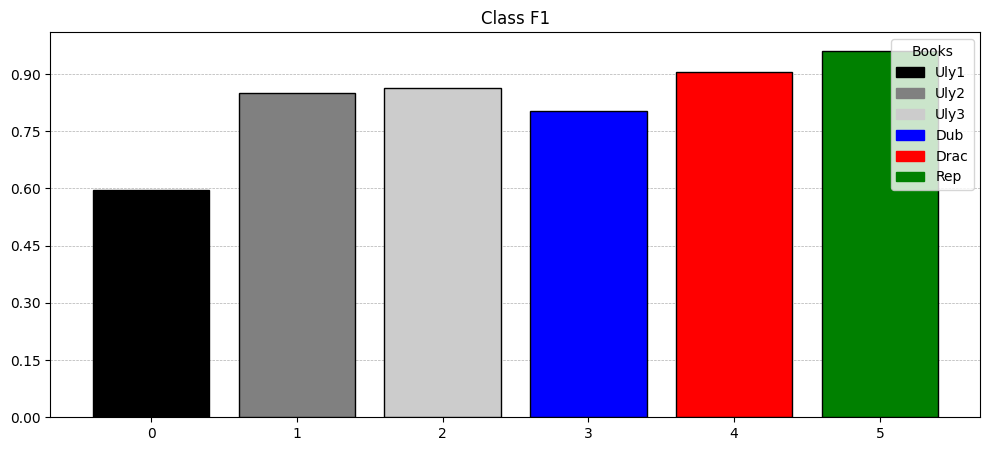

In [37]:
vals = book_f1
cats = [i for i in range(6)]
title = "Class F1"
bar_chart(vals, cats, title)

#### $\color{green}{Confusion:}$

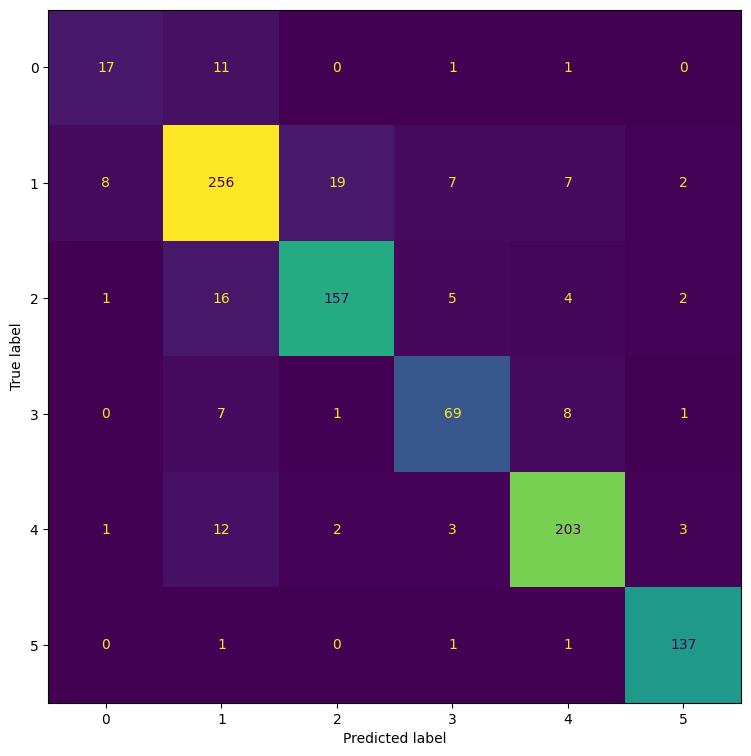

In [38]:
fig, ax = plt.subplots(figsize=(9,9))
cmp = ConfusionMatrixDisplay.from_predictions(book_reals, book_preds, colorbar=False, ax=ax)

## $\color{blue}{Examination:}$

In [39]:
# subset incorrect and view
df.columns

Index(['index', 'master', 'book_idx', 'book', 'chapter_idx', 'chapter',
       'author', 'content', 'vanilla_embedding', 'vanilla_preds',
       'vanilla_pseudo_book', 'vanilla_moe_e2e_soft_preds',
       'vanilla_moe_e2e_soft_pseudo_book', 'vanilla_moe_e2e_hard_preds',
       'vanilla_moe_e2e_hard_pseudo_book', 'vanilla_moe_e2e_soft_forest_preds',
       'vanilla_moe_e2e_soft_forest_pseudo_book'],
      dtype='object')

In [40]:
df_wrong_book = df[df.book_idx != df.vanilla_moe_e2e_soft_forest_pseudo_book]
df_wrong_book = df_wrong_book.reset_index(drop=True)
df_wrong_book.shape

(125, 17)

In [41]:
for i in range(10):
  ind = int(np.random.choice(df_wrong_book.shape[0],1))
  print('\n ------')
  print(f'Book: {df_wrong_book.loc[ind]["book_idx"]}, Chapter: {df_wrong_book.loc[ind]["chapter_idx"]}')
  print(df_wrong_book.loc[ind]['content'])
  print(f'Pred Book: {df_wrong_book.loc[ind]["vanilla_moe_e2e_soft_forest_pseudo_book"]}, Chapter: {df_wrong_book.loc[ind]["vanilla_moe_e2e_soft_forest_preds"]}')


 ------
Book: 1, Chapter: 12
ty bracegirdle made me do love sticky we two naughty Grace darling she him half
Pred Book: 2, Chapter: 17

 ------
Book: 2, Chapter: 17
what was his name Jack Joe Harry Mulvey was it yes I think a lieutenant he was
Pred Book: 3, Chapter: 31

 ------
Book: 3, Chapter: 21
Could she still draw back after all he had done for her? Her distress awoke a nausea in her body and she kept moving her lips in silent fervent prayer.   A bell clanged upon her heart. She felt him seize her hand:   “Come!”   All the seas of the world tumbled about her heart.
Pred Book: 1, Chapter: 12

 ------
Book: 4, Chapter: 49
Can it be that his instinct is satisfied as to the vampire’s ultimate triumph? Stay; he is himself zoöphagous, and in his wild ravings outside the chapel door of the deserted house he always spoke of “master.” This all seems confirmation of our idea.
Pred Book: 1, Chapter: 8

 ------
Book: 0, Chapter: 1
He recited jerks of verse with odd glances at the text:   —We

<ipython-input-41-0909422e78d5>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ind = int(np.random.choice(df_wrong_book.shape[0],1))


In [42]:
df_wrong_chapter = df[df.chapter_idx != df.vanilla_moe_e2e_soft_forest_preds]
df_wrong_chapter = df_wrong_chapter.reset_index(drop=True)
df_wrong_chapter.shape

(430, 17)

In [43]:
for i in range(10):
  ind = int(np.random.choice(df_wrong_chapter.shape[0],1))
  print('\n ------')
  print(f'Book: {df_wrong_chapter.loc[ind]["book_idx"]}, Chapter/ {df_wrong_chapter.loc[ind]["chapter_idx"]}')
  print(df_wrong_chapter.loc[ind]['content'])
  print(f'Pred Book: {df_wrong_chapter.loc[ind]["vanilla_moe_e2e_soft_forest_pseudo_book"]}, Chapter: {df_wrong_chapter.loc[ind]["vanilla_moe_e2e_soft_forest_preds"]}')


 ------
Book: 4, Chapter/ 49
I saw him leave for Whitby with as brave a face as I could, but I was sick with apprehension. The effort has, however, done him good. He was never so resolute, never so strong, never so full of volcanic energy, as at present.
Pred Book: 4, Chapter: 39

 ------
Book: 3, Chapter/ 31
And that was: to be straight and manly with God. If their accounts tallied in every point to say:   “Well, I have verified my accounts. I find all well.”   But if, as might happen, there were some discrepancies, to admit the truth, to be frank and say like a man:   “Well, I have looked into my accounts.
Pred Book: 5, Chapter: 64

 ------
Book: 1, Chapter/ 12
Say prunes and prisms forty times every morning, cure for fat lips. Caressing the little boy too. Onlookers see most of the game. Of course they understand birds, animals, babies. In their line.   Didn’t look back when she was going down the strand. Wouldn’t give that satisfaction.
Pred Book: 1, Chapter: 7

 ------
Book: 2, C

<ipython-input-43-6ac5340b402e>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ind = int(np.random.choice(df_wrong_chapter.shape[0],1))


## $\color{blue}{Examination:}$

In [44]:
D = {
    'model': ["vanilla_moe_e2e_soft_forest"],
    'params': [3061832],
    'book_accuracy' : [book_accuracy],
    'book_precision': [list(book_precision)],
    'book_macro_precision': [book_macro_precision],
    'book_weighted_precision': [book_weighted_precision],
    'book_recall': [list(book_recall)],
    'book_macro_recall': [book_macro_recall],
    'book_weighted_recall': [book_weighted_recall],
    'book_f1': [list(book_f1)],
    'book_macro_f1':[book_macro_f1],
    'book_weighted_f1': [book_weighted_f1],
        'chapter_accuracy' : [chapter_accuracy],
    'chapter_precision': [list(chapter_precision)],
    'chapter_macro_precision': [chapter_macro_precision],
    'chapter_weighted_precision': [chapter_weighted_precision],
    'chapter_recall': [list(chapter_recall)],
    'chapter_macro_recall': [chapter_macro_recall],
    'chapter_weighted_recall': [chapter_weighted_recall],
    'chapter_f1': [list(chapter_f1)],
    'chapter_macro_f1':[chapter_macro_f1],
    'chapter_weighted_f1': [chapter_weighted_f1],
}

In [45]:
path = "class/results/"
df_res = pd.read_pickle(path + "master_results.pk")

In [46]:
df_new = pd.DataFrame(D)

In [47]:
df_res = pd.concat([df_res, df_new], ignore_index=True)

In [48]:
df_res

,model,params,book_accuracy,book_precision,book_macro_precision,book_weighted_precision,book_recall,book_macro_recall,book_weighted_recall,book_f1,...,chapter_accuracy,chapter_precision,chapter_macro_precision,chapter_weighted_precision,chapter_recall,chapter_macro_recall,chapter_weighted_recall,chapter_f1,chapter_macro_f1,chapter_weighted_f1
0,vanilla,403070,0.883817,"[0.68, 0.8673469387755102, 0.8691099476439791,...",0.854691,0.882319,"[0.5666666666666667, 0.8528428093645485, 0.897...",0.836373,0.883817,"[0.6181818181818182, 0.8600337268128162, 0.882...",...,0.596473,"[0.6428571428571429, 0.8, 0.5, 0.3, 0.6, 0.714...",0.540711,0.614420,"[0.6923076923076923, 0.5714285714285714, 0.3, ...",0.502501,0.596473,"[0.6666666666666666, 0.6666666666666666, 0.375...",0.492163,0.592659
1,vanilla_moe_e2e_soft,1308029,0.879668,"[0.6, 0.872852233676976, 0.8601036269430051, 0...",0.842570,0.879652,"[0.6, 0.8494983277591973, 0.8972972972972973, ...",0.843171,0.879668,"[0.6, 0.8610169491525423, 0.8783068783068783, ...",...,0.618257,"[0.5882352941176471, 0.6666666666666666, 0.571...",0.560280,0.635325,"[0.7692307692307693, 0.5714285714285714, 0.4, ...",0.541950,0.618257,"[0.6666666666666666, 0.6153846153846154, 0.470...",0.536712,0.617050
2,vanilla_moe_e2e_hard,1308029,0.879668,"[0.6129032258064516, 0.8491803278688524, 0.857...",0.845688,0.880934,"[0.6333333333333333, 0.8662207357859532, 0.875...",0.846277,0.879668,"[0.6229508196721312, 0.8576158940397351, 0.866...",...,0.596473,"[0.6666666666666666, 0.5555555555555556, 0.4, ...",0.528659,0.612263,"[0.6153846153846154, 0.7142857142857143, 0.4, ...",0.526583,0.596473,"[0.64, 0.625, 0.4, 0.6666666666666666, 0.38095...",0.506712,0.592210
3,vanilla_moe_e2e_soft_forest,3061832,0.870332,"[0.6296296296296297, 0.8448844884488449, 0.877...",0.834169,0.869344,"[0.5666666666666667, 0.8561872909698997, 0.848...",0.826442,0.870332,"[0.5964912280701754, 0.8504983388704319, 0.862...",...,0.553942,"[0.6923076923076923, 0.5714285714285714, 0.571...",0.468744,0.565878,"[0.6923076923076923, 0.5714285714285714, 0.4, ...",0.455724,0.553942,"[0.6923076923076923, 0.5714285714285714, 0.470...",0.441130,0.549578


In [49]:
path = "class/results/"
df_res.to_pickle(path + "master_results.pk")